# Extinction Probabilities for a Branching Process with Imports

In [9]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import random

In [10]:
#parameters
d= 1/7
b= 3/7
alpha = 1
gamma=0.5
t=np.linspace(0,10, num=1000)
W0 = 5
Z_init = 1
numruns = 10000

In [11]:
t_length = len(t)
tmax = np.max(t)
dt = tmax/t_length

In [12]:
#Choices of time-dependent rates for beta, delta, eta
no_immigration = np.zeros_like(t)
delta = d*np.ones_like(t)
beta_const = b*np.ones_like(t)
beta_logistic = b/(1+5*np.exp(-t))
eta_exp = W0*np.exp(-gamma*t)

In [13]:
#Solve odes for analytic solutions
def h(R, t):
    u, z, r= R
    beta = b/(1+5*np.exp(-alpha*t))
    #beta = b #uncomment for constant growth rate
    delta = d
    eta = W0*np.exp(-gamma*t)
   
 
    drdt = [beta*np.exp(z), delta - beta, -eta*r]
    return drdt
initial_conditions = [0, 0, 1]
R =  odeint(h, initial_conditions, t)
q=1-(1/((np.exp(R[:,1])) + R[:,0]))
blarg = R[:,2]
rr = (q**Z_init)*(R[:,2]**(1-q))

In [14]:
#Branching process with immigration
def b_process_imgr(beta, delta, eta, Z_init, dt):
    b_length=len(beta)
    Z_count=np.zeros(b_length)
    Z=Z_init
    for i in range(0, b_length):
        rand=random.uniform(0, 1)
        b_prob = (beta[i]*Z + eta[i])*dt
        d_prob = delta[i]*Z*dt
        Z_count[i]=Z
        if Z==0:
            im_prob = eta[i]*dt
            if rand<im_prob:
                Z=Z+1
        else:
            if rand<b_prob:
                Z=Z+1
            elif b_prob<rand and rand<(d_prob+b_prob):
                Z=Z-1
            else:
                Z=Z
    return Z_count

In [15]:
#Simulate numruns number of branching processes
num_cases = np.zeros(numruns*t_length).reshape(numruns, t_length)
num_cases_imgr = np.zeros(numruns*t_length).reshape(numruns, t_length)
num_extinct = np.zeros_like(t)
num_zero_at_t = np.zeros_like(t)
for i in range(0, numruns):
    num_cases_imgr[i,:] = b_process_imgr(beta_logistic, delta, eta_exp, Z_init, dt)
    num_cases[i,:] = b_process_imgr(beta_logistic, delta, no_immigration, Z_init, dt)
    for j in range(0, t_length):
        if num_cases[i,j]==0:
            num_extinct[j] = num_extinct[j]+1
        if  num_cases_imgr[i,j] ==0:
            num_zero_at_t[j] = num_zero_at_t[j]+1

q_sim = num_extinct/numruns
r_sim = num_zero_at_t/numruns

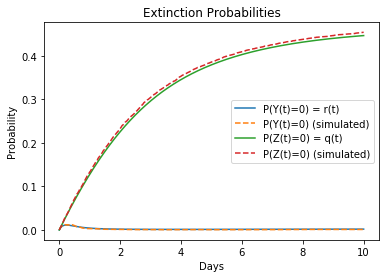

In [16]:
#Plot results
plt.figure()
plt.plot(t, rr, label = 'P(Y(t)=0) = r(t)')
plt.plot(t, r_sim, label = 'P(Y(t)=0) (simulated)', linestyle='dashed')
plt.plot(t, q, label = 'P(Z(t)=0) = q(t)')
plt.plot(t, q_sim, label = 'P(Z(t)=0) (simulated)', linestyle='dashed')
plt.title('Extinction Probabilities')
plt.xlabel('Days')
plt.ylabel('Probability')
plt.legend()